<a href="https://colab.research.google.com/github/tahani319/DS_ML_HousePrices/blob/main/DS_ML_HousePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 02/12/2020 

###DS_ML_HousePrice  

#### data from: https://www.kaggle.com/shree1992/housedata
####the data contains information  about selling houses in USA in 2014 
####it contains 18 variables and 4600 observation.

#### attributes: 

* price : price of selling homes
* sqft_living : the square foot of living area of homes
* sqft_lot: square foot of the land
* sqft_above : squre foot of above
* sqft_basement : squre foot of basement
* bedrooms: number of bedrooms
* bathrooms: number of bathrooms
* conditions: number of conditions
* city : the city of each selling house
* statezip : zip code of state
* view
* waterfront
* country

     ####   my main goal is to building a model to predict the price of a house 
####based on specific features of the house using different algorithim and methods I have learned:


* EDA 
* Data visualization
* preprocessing
* one hot encoding
* dealing with outliers 
* Linear regression


##EDA

#####so i start with EDA to understand my data :

load packages:

In [60]:

# Helper packages
import numpy as np
import pandas as pd
from plotnine import ggplot, aes, geom_density, geom_line, geom_point, ggtitle
import math
import matplotlib.pyplot  as plt
import seaborn as sns
%matplotlib inline
import pickle
# Modeling preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer

# Modeling and resampling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
pd.options.display.float_format = '{:.5f}'.format
import warnings
import math
import scipy.stats as stats
import scipy
from sklearn.preprocessing import scale
warnings.filterwarnings('ignore')




data:

In [61]:
house = pd.read_csv('data.csv') 


Explore data : 

In [62]:
house.head() #see the first rows 

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.00000,3.00000,1.50000,1340,7912,1.50000,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.00000,5.00000,2.50000,3650,9050,2.00000,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.00000,3.00000,2.00000,1930,11947,1.00000,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.00000,3.00000,2.25000,2000,8030,1.00000,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.00000,4.00000,2.50000,1940,10500,1.00000,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [63]:
house.tail() #see the last rows 

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.66667,3.00000,1.75000,1510,6360,1.00000,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.33333,3.00000,2.50000,1460,7573,2.00000,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.16667,3.00000,2.50000,3010,7014,2.00000,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.00000,4.00000,2.00000,2090,6630,1.00000,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.00000,3.00000,2.50000,1490,8102,2.00000,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [64]:
house.describe() #describe data 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600.00000,4600.00000,4600.00000,4600.00000,4600.00000,4600.00000,4600.00000,4600.00000,4600.00000,4600.00000,4600.00000,4600.00000,4600.00000
mean,551962.98847,3.40087,2.16082,2139.34696,14852.51609,1.51207,0.00717,0.24065,3.45174,1827.26543,312.08152,1970.78630,808.60826
std,563834.70255,0.90885,0.78378,963.20692,35884.43614,0.53829,0.08440,0.77840,0.67723,862.16898,464.13723,29.73185,979.41454
min,0.00000,0.00000,0.00000,370.00000,638.00000,1.00000,0.00000,0.00000,1.00000,370.00000,0.00000,1900.00000,0.00000
25%,322875.00000,3.00000,1.75000,1460.00000,5000.75000,1.00000,0.00000,0.00000,3.00000,1190.00000,0.00000,1951.00000,0.00000
50%,460943.46154,3.00000,2.25000,1980.00000,7683.00000,1.50000,0.00000,0.00000,3.00000,1590.00000,0.00000,1976.00000,0.00000
75%,654962.50000,4.00000,2.50000,2620.00000,11001.25000,2.00000,0.00000,0.00000,4.00000,2300.00000,610.00000,1997.00000,1999.00000
max,26590000.00000,9.00000,8.00000,13540.00000,1074218.00000,3.50000,1.00000,4.00000,5.00000,9410.00000,4820.00000,2014.00000,2014.00000


In [65]:
house.info() #data information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

change statezip into factor

In [66]:
 #change statezip into factor  

house['statezip'] = house['statezip'].astype('category')

change bedrooms, bathrooms into integers

In [67]:
house['bedrooms'] = house['bedrooms'].astype('int64') #change bedrooms, bathrooms into integers
house['bathrooms'] = house['bathrooms'].astype('int64')

In [68]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   date           4600 non-null   object  
 1   price          4600 non-null   float64 
 2   bedrooms       4600 non-null   int64   
 3   bathrooms      4600 non-null   int64   
 4   sqft_living    4600 non-null   int64   
 5   sqft_lot       4600 non-null   int64   
 6   floors         4600 non-null   float64 
 7   waterfront     4600 non-null   int64   
 8   view           4600 non-null   int64   
 9   condition      4600 non-null   int64   
 10  sqft_above     4600 non-null   int64   
 11  sqft_basement  4600 non-null   int64   
 12  yr_built       4600 non-null   int64   
 13  yr_renovated   4600 non-null   int64   
 14  street         4600 non-null   object  
 15  city           4600 non-null   object  
 16  statezip       4600 non-null   category
 17  country        4600 non-null   ob

to see the count of country in dataset 

In [69]:
house.country.value_counts() #to see the count of country in dataset

USA    4600
Name: country, dtype: int64

to see how many city in dataset 

In [70]:
house.city.value_counts() #to see how many city in dataset



Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Kirkland                187
Issaquah                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Newcastle                33
Bothell                  33
Vashon                   29
Tukwila                  29
SeaTac                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Medina                   11
Fall City                11
Clyde Hill               11
Black Diamond             9
Ravensdale                7
Pacific             

In [71]:
house.statezip.value_counts()


WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: statezip, Length: 77, dtype: int64

since I have statezip I do not need to city and street columns
also i deleted contry and date columns because they do not neccessary 

In [72]:
house.drop(['date','street', 'city', 'country'], axis = 1, inplace = True) #drop columns of data, street, city, country because they aren't neccessary here 

In [73]:
house.head() #to see data head after drop columns

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
0,313000.00000,3,1,1340,7912,1.50000,0,0,3,1340,0,1955,2005,WA 98133
1,2384000.00000,5,2,3650,9050,2.00000,0,4,5,3370,280,1921,0,WA 98119
2,342000.00000,3,2,1930,11947,1.00000,0,0,4,1930,0,1966,0,WA 98042
3,420000.00000,3,2,2000,8030,1.00000,0,0,4,1000,1000,1963,0,WA 98008
4,550000.00000,4,2,1940,10500,1.00000,0,0,4,1140,800,1976,1992,WA 98052


**counts of price:**

In [74]:
house.price.value_counts() #count values of price column 

0.00000         49
300000.00000    42
400000.00000    31
450000.00000    29
600000.00000    29
                ..
586500.00000     1
693000.00000     1
226500.00000     1
257200.00000     1
256000.00000     1
Name: price, Length: 1741, dtype: int64

 the data have 49 values of price is 0. 

**counts of bedrooms:**

In [75]:
house.bedrooms.value_counts() #count values of bedrooms column

3    2032
4    1531
2     566
5     353
6      61
1      38
7      14
8       2
0       2
9       1
Name: bedrooms, dtype: int64

**counts of bathrooms:**

In [76]:
house.bathrooms.value_counts() #count values of bathrooms column 

2    2311
1    1666
3     502
4      82
0      19
5      15
6       4
8       1
Name: bathrooms, dtype: int64

**counts of floors:**

In [77]:
house.floors.value_counts() #count values of floors column 

1.00000    2174
2.00000    1811
1.50000     444
3.00000     128
2.50000      41
3.50000       2
Name: floors, dtype: int64

**counts of view:** 

In [78]:
house.view.value_counts() #count values of view column 

0    4140
2     205
3     116
4      70
1      69
Name: view, dtype: int64

the view column have 4140 values is 0 

**counts of waterfront:**

In [79]:
house.waterfront.value_counts() #count values of waterfront column 

0    4567
1      33
Name: waterfront, dtype: int64

the waterfront column have 4567 values is 0 

**correlation:**

In [80]:
frame_for_matrix = house[[ 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated']]  #make data fram for correlation 

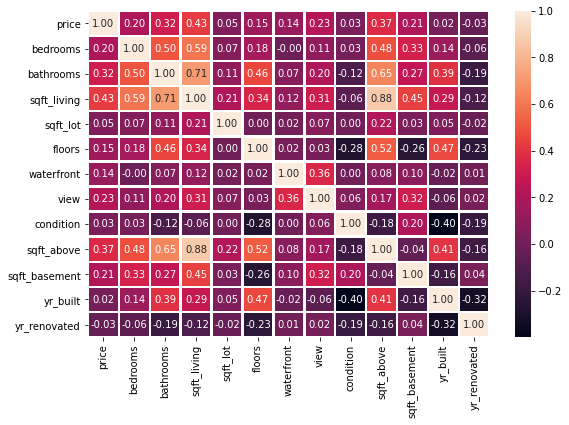

In [81]:
corr = frame_for_matrix.corr() 

f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(corr,annot=True,linewidths=1.5,fmt='.2f',ax=ax)
plt.show()  #correlation visualization 

notes : 

 

*   the price and amount of sqft_living are correlated, if size of sqft_living increase prices also increase 

* the sqft living and sqft above are 
highly correlated 0.88







see all distributions of each column in data:

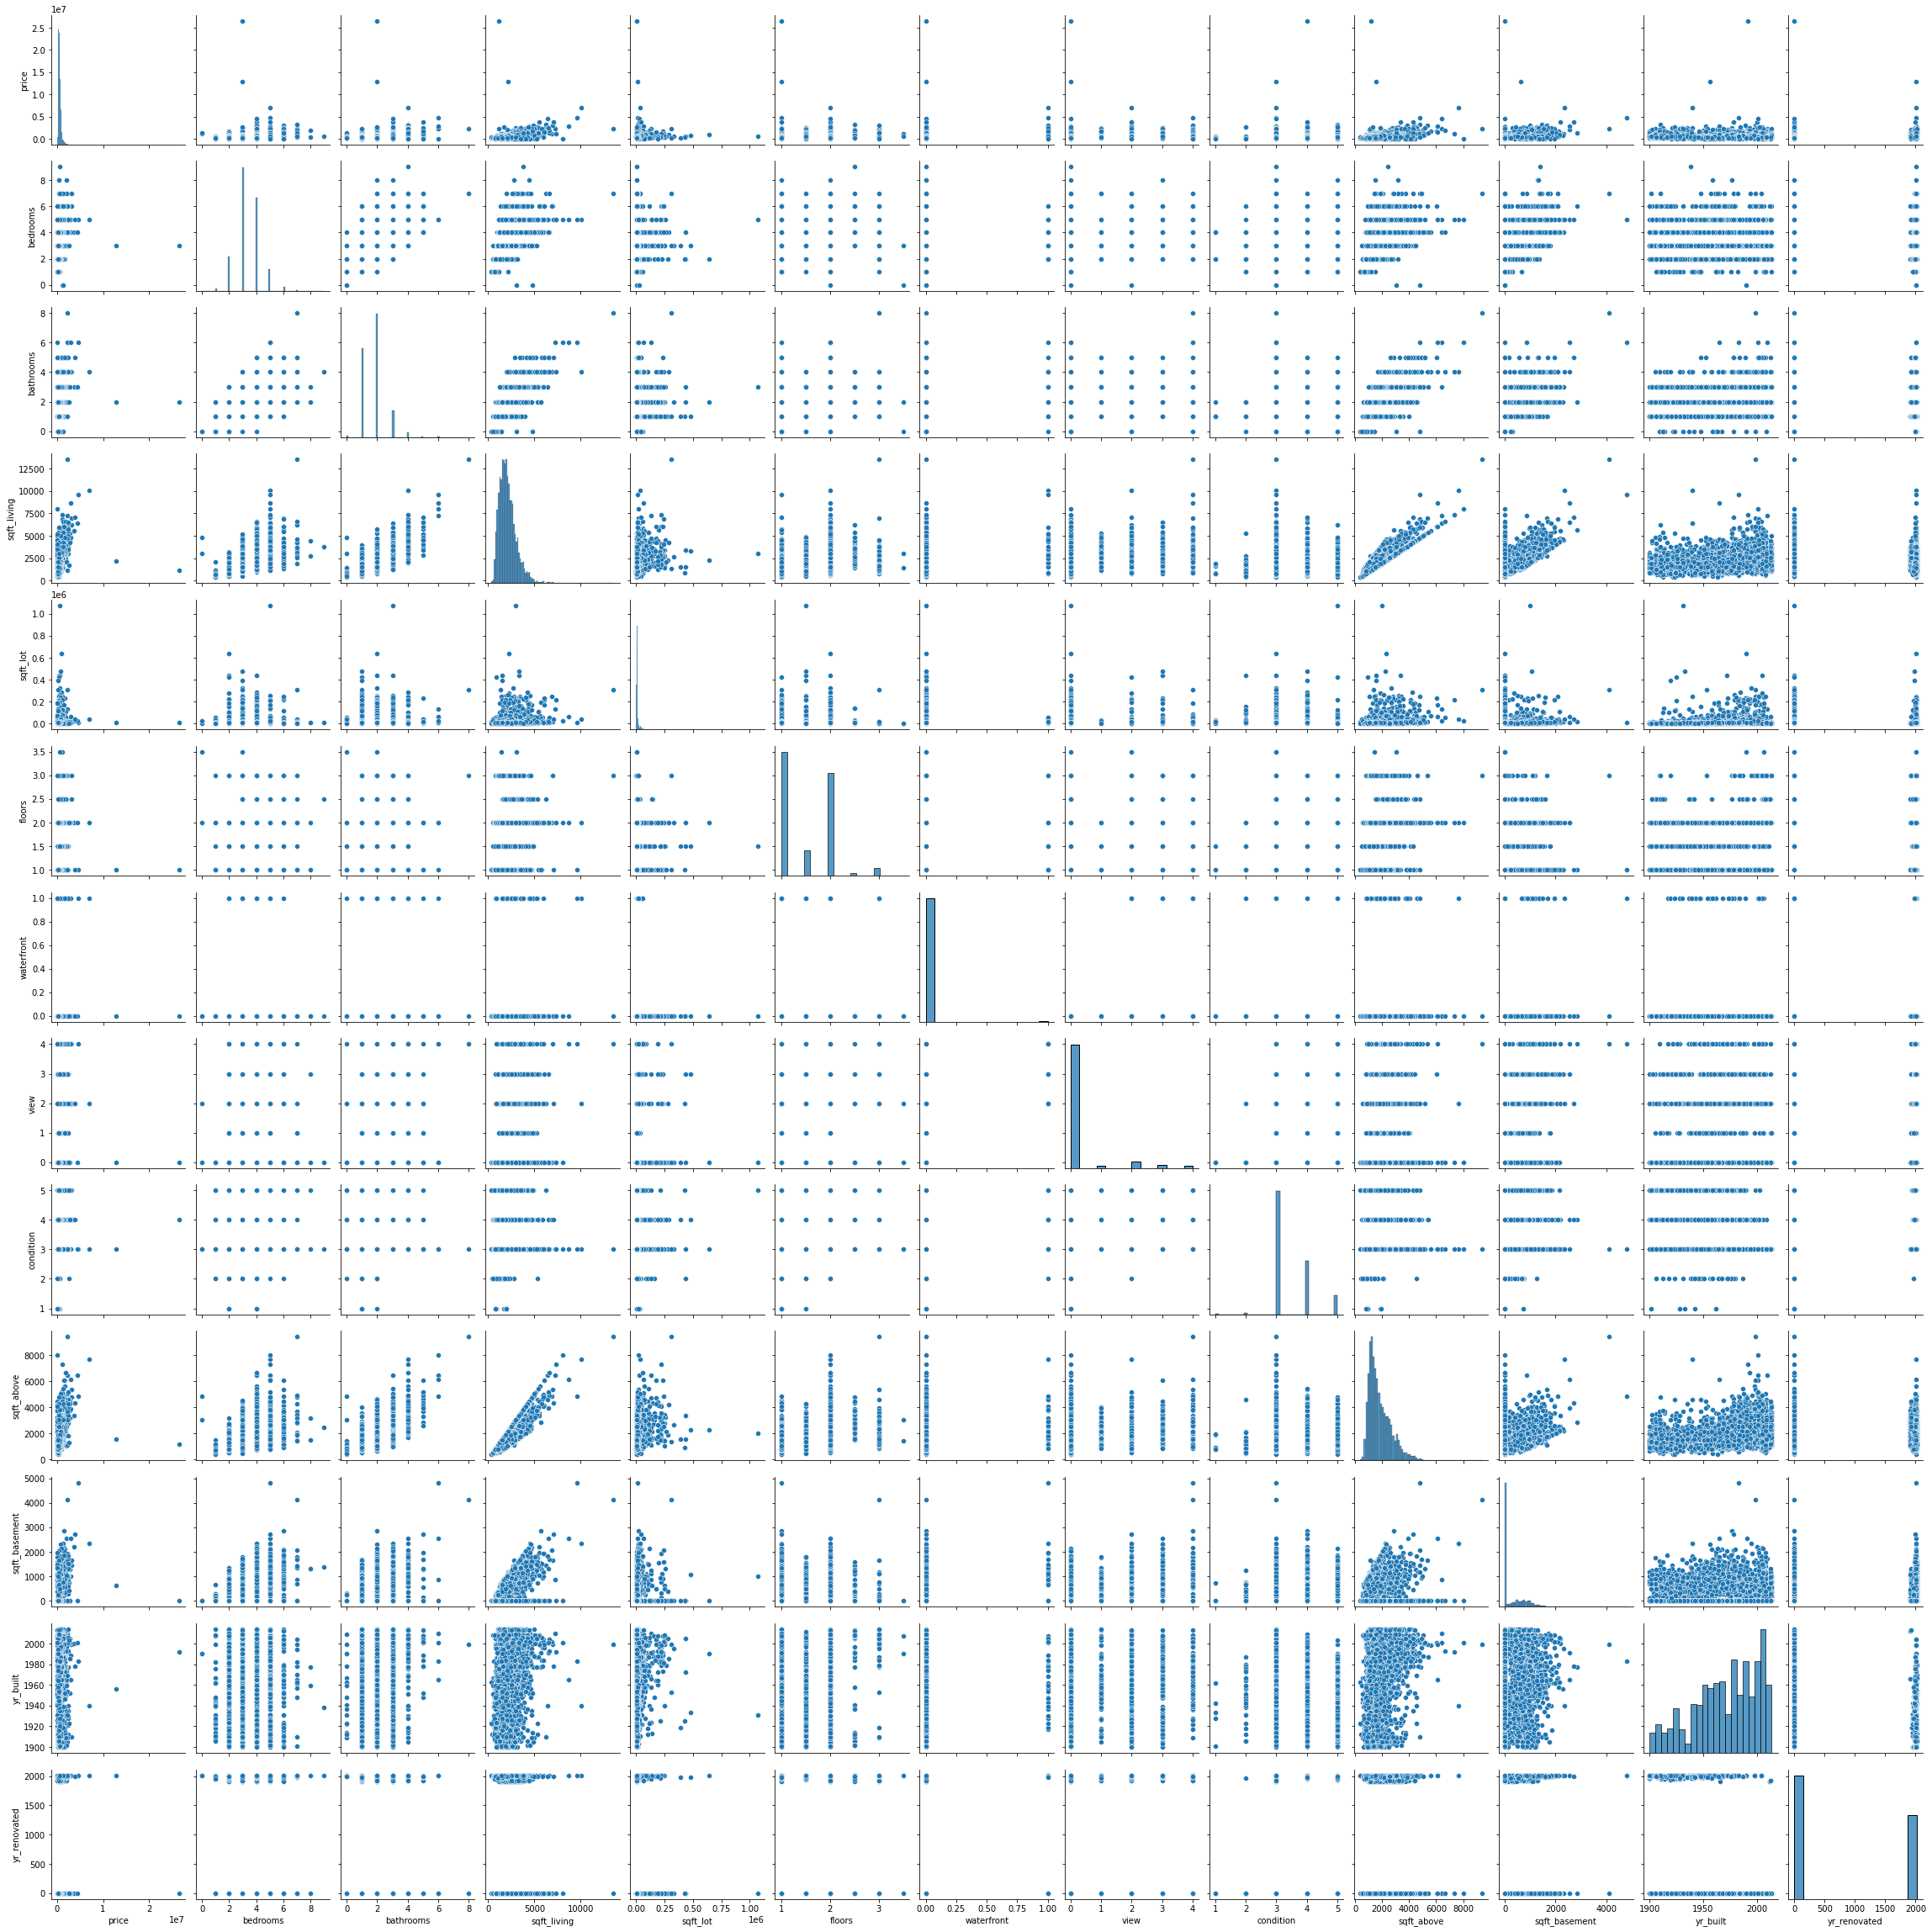

In [82]:
sns.pairplot(house) #see all distributions of each columns in data :

**show the outliers using plotbox:**

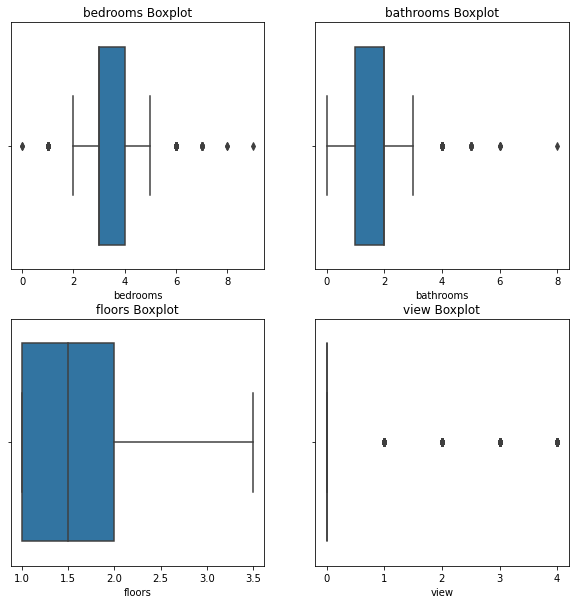

In [83]:
plt.figure(figsize=(10, 10)) #to see outliers in dataset 
plt.subplot(2,2,1)
sns.boxplot(x = 'bedrooms', data = house).set_title('bedrooms Boxplot')
plt.subplot(2,2,2)
sns.boxplot(x = 'bathrooms', data = house).set_title('bathrooms Boxplot')
plt.subplot(2,2,3)
sns.boxplot(x = 'floors', data = house).set_title('floors Boxplot')
plt.subplot(2,2,4)
sns.boxplot(x = 'view',  data = house).set_title('view Boxplot')


plt.show()

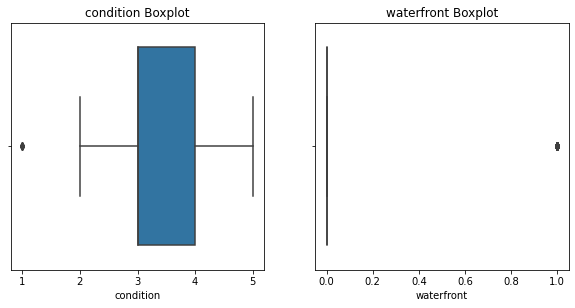

In [84]:
plt.figure(figsize=(10, 10)) #to see outliers in dataset 
plt.subplot(2,2,1)
sns.boxplot(x = 'condition', data = house).set_title('condition Boxplot')
plt.subplot(2,2,2)
sns.boxplot(x = 'waterfront', data = house).set_title('waterfront Boxplot')



plt.show()

it seems that we have outliers in data, so we try to deal with 

see distribution of price:

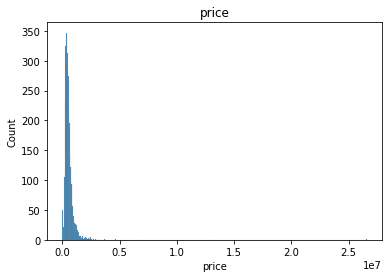

In [85]:

sns.histplot(x = 'price',  data = house).set_title('price')
plt.show() #see distribution of price

**Identifying Outliers with Interquartile Range (IQR):**
 we identifed outliers in data using (IQR)

In [86]:
#Identifying Outliers with Interquartile Range (IQR)
Q1 = house.quantile(0.25)
Q3 = house.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

price           332087.50000
bedrooms             1.00000
bathrooms            1.00000
sqft_living       1160.00000
sqft_lot          6000.50000
floors               1.00000
waterfront           0.00000
view                 0.00000
condition            1.00000
sqft_above        1110.00000
sqft_basement      610.00000
yr_built            46.00000
yr_renovated      1999.00000
dtype: float64


skeweness:

In [87]:
print(house['price'].skew()) #see skeweness  
house['price'].describe()

24.790932561757053


count       4600.00000
mean      551962.98847
std       563834.70255
min            0.00000
25%       322875.00000
50%       460943.46154
75%       654962.50000
max     26590000.00000
Name: price, dtype: float64

plot the price:

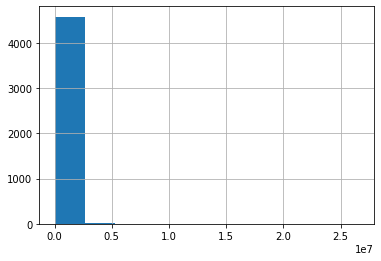

In [88]:
house.price.hist()  #plot the price 

**outliers treatment:**

In this technique, we do the flooring  10th percentile for the lower values and capping the 90th percentile for the higher values :

In [89]:
print(house['price'].quantile(0.10))  #10th percentile for the lower values and capping the 90th percentile for the higher values
print(house['price'].quantile(0.90))

239950.0
900000.0


we remove the outliers

In [90]:
house["price"] = np.where(house["price"] <239950.0, 239950.0,house['price']) #rmove outlier
house["price"] = np.where(house["price"] >900000.0, 900000.0,house['price'])
print(house['price'].skew())

0.5334648632560575


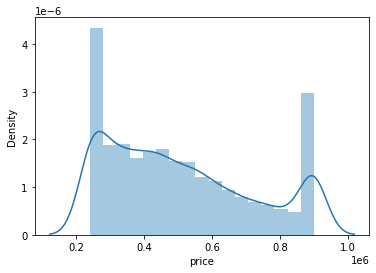

In [91]:
sns.distplot(house['price']) #viualize distribution of price 

**see the distribution of target varibale:**

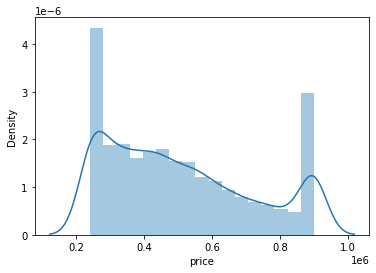

In [92]:
sns.distplot(house['price']) #viualize distribution of price 

**Missing values:**

check if the data has missing values 

In [93]:
house.isnull().sum() #check if data has missing values 

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
statezip         0
dtype: int64

we have no missing values.

**one hot encoding:** 

we used one hot encoding for categorical feature  **statezip**

apply label encoder

In [94]:
#apply label encoder
#import library
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
house['statezip_encoded'] = le.fit_transform(house.statezip)
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip,statezip_encoded
0,313000.00000,3,1,1340,7912,1.50000,0,0,3,1340,0,1955,2005,WA 98133,62
1,900000.00000,5,2,3650,9050,2.00000,0,4,5,3370,280,1921,0,WA 98119,58
2,342000.00000,3,2,1930,11947,1.00000,0,0,4,1930,0,1966,0,WA 98042,26
3,420000.00000,3,2,2000,8030,1.00000,0,0,4,1000,1000,1963,0,WA 98008,7
4,550000.00000,4,2,1940,10500,1.00000,0,0,4,1140,800,1976,1992,WA 98052,31


In [95]:
house.statezip_encoded.value_counts()

47    148
31    135
56    132
54    130
5     110
     ... 
28      6
75      3
29      2
76      2
39      1
Name: statezip_encoded, Length: 77, dtype: int64

Drop the statezip field:

In [96]:
#Drop the statezip field
house.drop(['statezip'], axis = 1, inplace = True)
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip_encoded
0,313000.00000,3,1,1340,7912,1.50000,0,0,3,1340,0,1955,2005,62
1,900000.00000,5,2,3650,9050,2.00000,0,4,5,3370,280,1921,0,58
2,342000.00000,3,2,1930,11947,1.00000,0,0,4,1930,0,1966,0,26
3,420000.00000,3,2,2000,8030,1.00000,0,0,4,1000,1000,1963,0,7
4,550000.00000,4,2,1940,10500,1.00000,0,0,4,1140,800,1976,1992,31


One hot encoding:

In [97]:
#One hot encoding
from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder()

In [98]:
ohc_df = pd.DataFrame(ohc.fit_transform(house[['statezip_encoded']]).toarray())
# ohc_df = ohc_df.astype(int)
ohc_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


Mergeing ohc_df into the main dataset:

In [99]:
house = house.join(ohc_df)
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip_encoded,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,...,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76
0,313000.00000,3,1,1340,7912,1.50000,0,0,3,1340,0,1955,2005,62,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,900000.00000,5,2,3650,9050,2.00000,0,4,5,3370,280,1921,0,58,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,342000.00000,3,2,1930,11947,1.00000,0,0,4,1930,0,1966,0,26,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,420000.00000,3,2,2000,8030,1.00000,0,0,4,1000,1000,1963,0,7,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,550000.00000,4,2,1940,10500,1.00000,0,0,4,1140,800,1976,1992,31,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [100]:
house.tail()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip_encoded,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,...,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76
4595,308166.66667,3,1,1510,6360,1.00000,0,0,4,1510,0,1954,1979,62,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4596,534333.33333,3,2,1460,7573,2.00000,0,0,3,1460,0,1983,2009,6,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4597,416904.16667,3,2,3010,7014,2.00000,0,0,3,3010,0,2009,0,37,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4598,239950.00000,4,2,2090,6630,1.00000,0,0,3,1070,1020,1974,0,71,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4599,239950.00000,3,2,1490,8102,2.00000,0,0,4,1490,0,1990,0,26,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


drop satazip_encoded

In [101]:
#drop satazip_encoded
house.drop(['statezip_encoded'], axis = 1, inplace = True)

In [102]:
house.info

<bound method DataFrame.info of             price  bedrooms  bathrooms  ...      74      75      76
0    313000.00000         3          1  ... 0.00000 0.00000 0.00000
1    900000.00000         5          2  ... 0.00000 0.00000 0.00000
2    342000.00000         3          2  ... 0.00000 0.00000 0.00000
3    420000.00000         3          2  ... 0.00000 0.00000 0.00000
4    550000.00000         4          2  ... 0.00000 0.00000 0.00000
...           ...       ...        ...  ...     ...     ...     ...
4595 308166.66667         3          1  ... 0.00000 0.00000 0.00000
4596 534333.33333         3          2  ... 0.00000 0.00000 0.00000
4597 416904.16667         3          2  ... 0.00000 0.00000 0.00000
4598 239950.00000         4          2  ... 0.00000 0.00000 0.00000
4599 239950.00000         3          2  ... 0.00000 0.00000 0.00000

[4600 rows x 90 columns]>

#### **Building a linear regression model:**

**prepare data:** 

In [104]:
X = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated']]
y = house['price']

**Splitting the dataset into training and test set:**  

In [105]:
# Splitting the dataset into training and test set.  
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123) 

In [106]:
lm = LinearRegression() 

lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**linear regression model evaluation:**

In [107]:
print(lm.intercept_)

2810220.7435299535


In [108]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-21400.45063
bathrooms,6259.77166
sqft_living,95.37156
sqft_lot,-0.22256
floors,71468.65431
waterfront,-27547.15551
view,25408.15386
condition,19383.16124
sqft_above,51.47242
sqft_basement,43.89914


In [109]:
predictions = lm.predict(x_test)

show prediciton: 

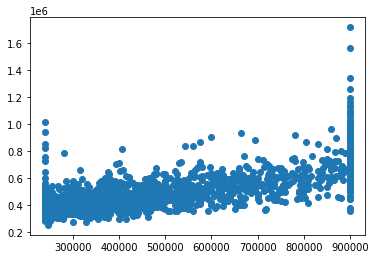

In [110]:
plt.scatter(y_test,predictions) #show prediciton

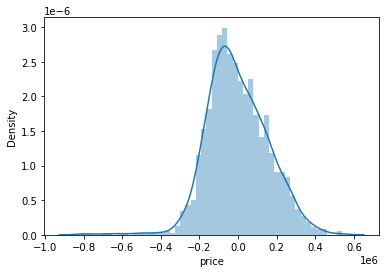

In [111]:
sns.distplot((y_test-predictions),bins=50); 

show RMSE, MSE and MAE:

In [112]:
#show RMSE, MSE and MAE
#import library
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions)) 
print('MSE:', metrics.mean_squared_error(y_test, predictions)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) 

MAE: 123088.44303179413
MSE: 24452835218.13158
RMSE: 156374.0234761886
